<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  PROJECT: ... 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 1 - PRE-PROCESSING 📌
</div>

## **IMPORT LIBRARY** 🎄

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import zscore

## **GENERAL INFORMATION ABOUT THE DATA** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. Read data 🔥
</div>

In [4]:
df = pd.read_csv('../../Data/2425_QC.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  2. Comment on statistic of dataframe 🔥
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1002 non-null   float64
 1   Age                       1001 non-null   float64
 2   Area Income               1002 non-null   float64
 3   Daily Internet Usage      1002 non-null   float64
 4   Ad Topic Line             1002 non-null   object 
 5   City                      1002 non-null   object 
 6   Male                      1002 non-null   int64  
 7   Country                   1002 non-null   object 
 8   Timestamp                 1002 non-null   object 
 9   Clicked on Ad             1002 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.4+ KB


📈`COMMENT:`
- Data Overview: The DataFrame has 1002 entries. There are 10 columns in total, with a mix of data types: float64, int64, and object. 
- dtypes: float64(4), int64(2), object(4)
- All columns, except `Age`, contain 1002 non-null values, meaning there’s only 1 missing value for the `Age` column.
- Columns like `Age`, `Area Income`, `City`, `Country`, and `Male` provide key demographic details, possibly used to profile customers.
- The dataset includes `Daily Time Spent on Site` and `Daily Internet Usage`, which track users' online behavior and engagement. These could be critical features for determining customers's likelihood of interacting with ads.
- `Ad Topic Line` might represent the theme or content of the advertisement.
- `Clicked on Ad` likely serves as a target variable, a binary classification indicating whether a user clicked an ad (1 for clicked, 0 for not clicked).
- `Timestamps` column can provide insights into the temporal patterns of customer behavior.

📝`INSIGHT:`
- The dataset is almost complete with only a single missing value in the `Age` column, so missing data handling won't be a major issue.
- The combination of online activity, demographic information, and customer interaction (clicked or not clicked) creates a strong foundation for building models to predict ad clicks based on customer behavior.
- Columns like `City`, `Country`, and `Ad Topic Line` will likely require preprocessing, such as encoding, to make them suitable for analysis or modeling.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. What does each column mean?? 🧮
</div>

<table style="width: 100%; border-collapse: collapse;font-family: 'Trebuchet MS', Arial, sans-serif;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">No</th>
      <th style="background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Column Name</th>
      <th style="background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Meaning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">1</td>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">Daily Time Spent on Site</td>
      <td style="font-size: 17px; text-align: left;">Customer time on site in minutes.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">Age</td>
      <td style="font-size: 17px; text-align: left;">Customer age in years.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #009A80; text-align: left;">3</td>
      <td style="font-weight: bold; font-size: 17px; color: #009A80; text-align: left;">Area Income</td>
      <td style="font-size: 17px; text-align: left;">Average income of geographical area of customer.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">4</td>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">Daily Internet Usage</td>
      <td style="font-size: 17px; text-align: left;">Average minutes a day customer is on the internet.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">Ad Topic Line</td>
      <td style="font-size: 17px; text-align: left;">Headline of the advertisement.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">6</td>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">City</td>
      <td style="font-size: 17px; text-align: left;">City of customer.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">7</td>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">Male</td>
      <td style="font-size: 17px; text-align: left;">Whether or not customer was male.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">8</td>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">Country</td>
      <td style="font-size: 17px; text-align: left;">Country of customer.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #00A9FF; text-align: left;">9</td>
      <td style="font-weight: bold; font-size: 17px; color: #00A9FF; text-align: left;">Timestamp</td>
      <td style="font-size: 17px; text-align: left;">Time at which customer clicked on Ad or closed window.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">10</td>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">Clicked on Ad</td>
      <td style="font-size: 17px; text-align: left;">0 or 1 indicated clicking on Ad.</td>
    </tr>
  </tbody>
</table>

## **PROCESS PHASE** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. How many rows and how many columns does the data have? 🧮
</div>

In [7]:
shape = df.shape
print(f"Current shape: {shape}")

Current shape: (1002, 10)


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  2. What does each line mean? Does it matter if the lines have different meanings? 🧮
</div>

🔍🔍🔍 Understand the meaning of each line gives us a more overall understanding of the data.\
🔍🔍🔍 What our data is talking about or if some lines of data have different meanings, it will lead to the unconsistency of data and giving wrong insights.

📈`COMMENT:`
- Each row represents data about an individual's interaction with an online advertisement.
- This dataset would typically be used to analyze and predict user behavior, particularly what factors influence a customer's likelihood to click on an ad. Insights drawn from this kind of data help companies refine their ad strategies, target the right audiences, and optimize their marketing budget.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #E7B10A; padding: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
🧮🧮🧮  In our data, each line contains data about an individual's interaction with an online advertisement.
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. Is there duplicate data? 🧮
</div>

🚨  We need to check for the duplicated rows since duplicated rows don't have much meaning, even affect the overall insight of data.\
🚨  Therefore, each line should differ from each others.\
🚨  Having duplicated rows could lead to wrong insights for questions required counting.\
🚨  In this part, we will delve into check for duplicated rows. If duplicated rows exist, then drop it.

📈`COMMENT:`
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  4. Is there outlier data? 🧮
</div>

🚨  Outliers are values that significantly deviate from other observations in the dataset.\
🚨  Outliers can skew results and lead to misleading conclusions if not handled properly.\
🚨  Identifying outliers is important to maintain data quality and improve the accuracy of the analysis.\
🚨  In this part, we will check for any outliers and determine whether to keep, transform, or remove them depending on their impact.

📝 **Using IQR**

Explain...

📈`COMMENT:`
- ...

📝 **Using Z-Score**

The Z-score is a statistical method used to determine how far a data point deviates from the mean of a dataset. It measures how many standard deviations a data point is from the mean.

A typical threshold for outliers using Z-scores is 3 (or -3). Any data point with a Z-score greater than 3 or less than -3 is considered an outlier.

We'll use zscore function from scipy to calculate the Z-score for a dataset

In [100]:
def detect_outlier_z_score(df:pd.DataFrame, threshold):
    z_scores_abs = abs(zscore(df))
    test = pd.DataFrame(z_scores_abs, columns=df.columns)
    outlier_index = (test > threshold).any(axis=1)
    return outlier_index


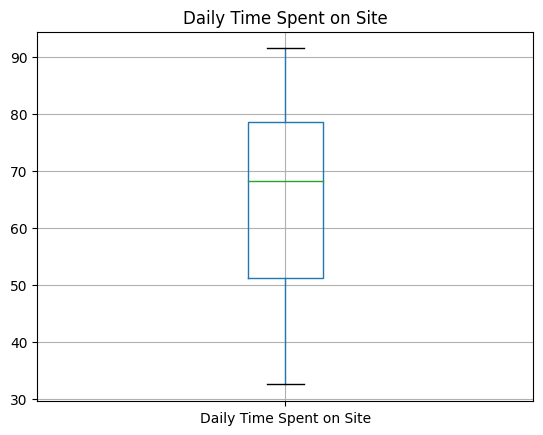

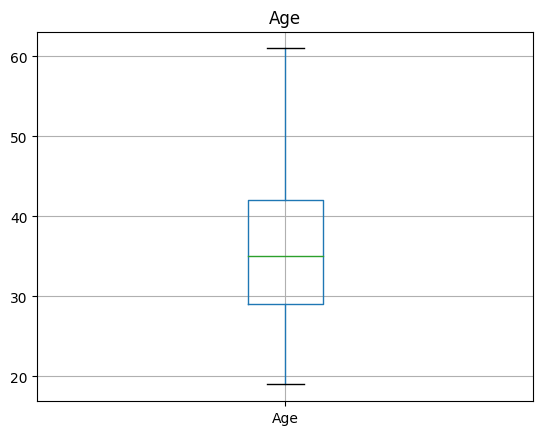

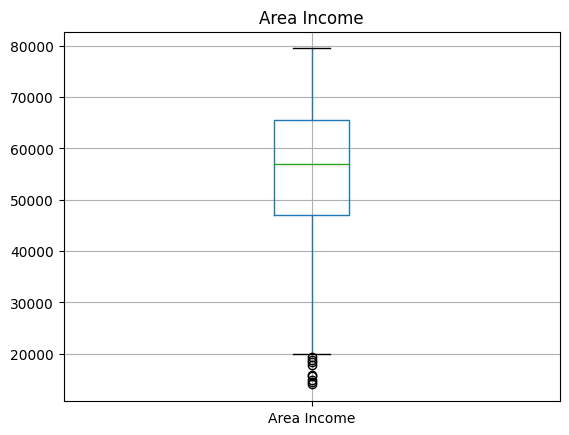

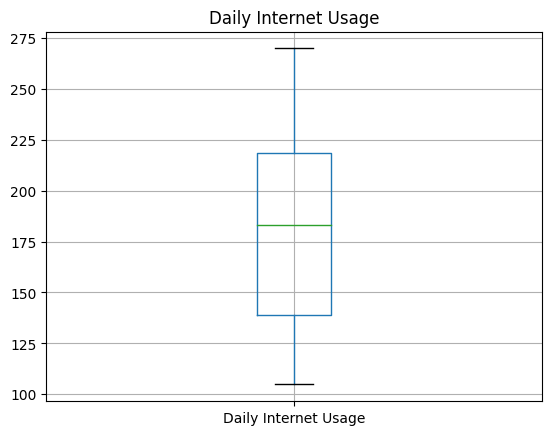

In [10]:
pd.DataFrame(df['Daily Time Spent on Site']).boxplot()
plt.title("Daily Time Spent on Site")
plt.show()

pd.DataFrame(df['Age']).boxplot()
plt.title("Age")
plt.show()

pd.DataFrame(df['Area Income']).boxplot()
plt.title("Area Income")
plt.show()

pd.DataFrame(df['Daily Internet Usage']).boxplot()
plt.title("Daily Internet Usage")
plt.show()


In [105]:
invalid_index = detect_outlier_z_score(df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']], 3)
print(df[invalid_index])

     Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
692                     66.26  47.0     14548.06                179.04   
769                     68.58  41.0     13996.50                171.54   
779                     52.67  44.0     14775.50                191.26   

                                Ad Topic Line              City  Male  \
692            Optional full-range projection       Matthewtown     1   
769               Exclusive discrete firmware  New Williamville     1   
779  Persevering 5thgeneration knowledge user     New Hollyberg     0   

         Country        Timestamp  Clicked on Ad  
692      Lebanon  25/4/2016 19:31              1  
769  El Salvador   6/7/2016 12:04              1  
779       Jersey   19/5/2016 6:37              1  


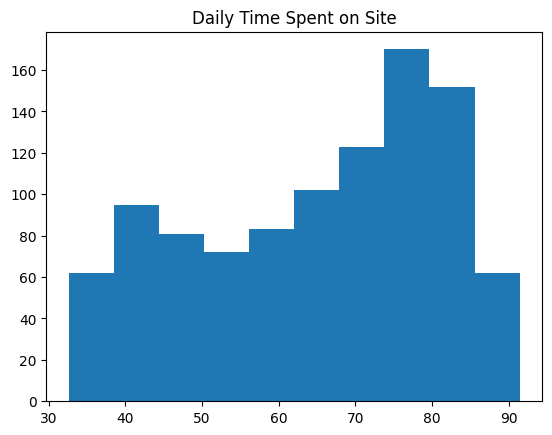

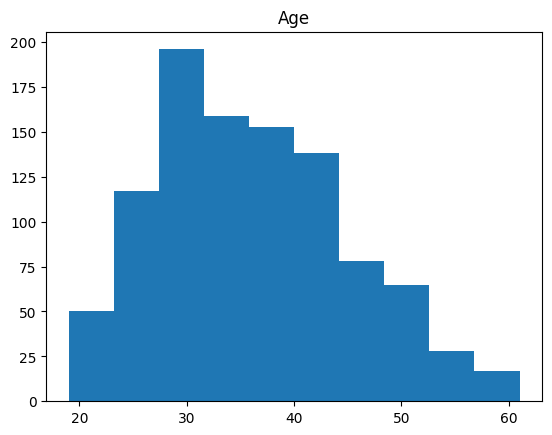

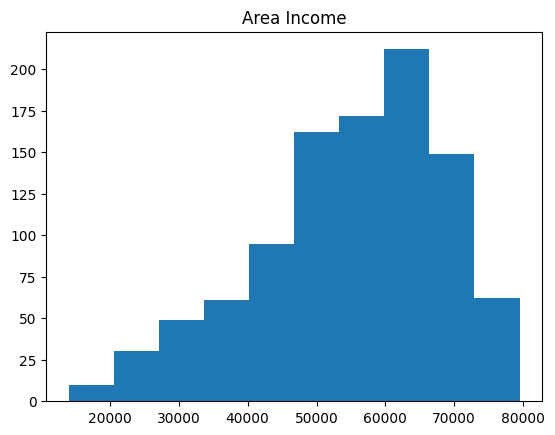

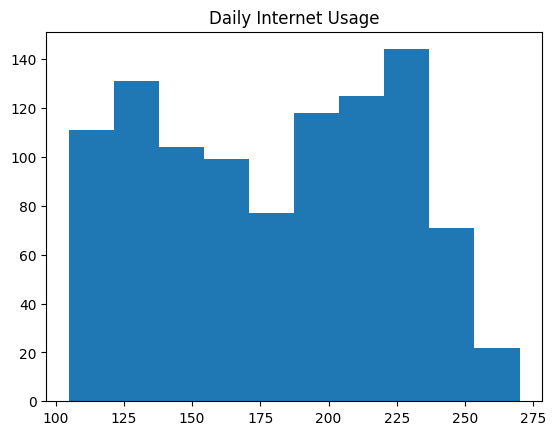

In [81]:
plt.hist(df['Daily Time Spent on Site'])
plt.title("Daily Time Spent on Site")
plt.show()

plt.hist(df['Age'])
plt.title("Age")
plt.show() 

plt.hist(df['Area Income'])
plt.title("Area Income")
plt.show() 

plt.hist(df['Daily Internet Usage'])
plt.title("Daily Internet Usage")
plt.show() 

📈`COMMENT:`

We detect 3 outliers using z-score with threshold = 3

We will treat the outliers by capping them because those outliers are reasonable and not likely to be a false input

By looking at the histograms and boxplot, we can determine that the outliers most likely to be in the Area Income column

In [112]:
lower_limit = df['Area Income'].quantile(0.01)
upper_limit = df['Area Income'].quantile(0.99)

df['Area Income'] = df['Area Income'].clip(lower=lower_limit, upper=upper_limit)

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  5. Is there missing data? 🧮
</div>

🚨  Missing data can distort the results of our analysis and lead to inaccurate insights.\
🚨  It is crucial to identify and handle missing values effectively.\
🚨  If missing data exists, we will explore strategies to fill or remove them based on the context and nature of the dataset.\
🚨  In this section, we will analyze for any missing values and take necessary actions such as filling, imputation, or removal.

📈`COMMENT:`
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  6. Is there any imbalance in "Clicked on AD" labels?
</div>

🔍🔍🔍 ... Explain what is this?
🔍🔍🔍 ... Explain what is this?

📈`COMMENT:`
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding-left: 20px; padding-bottom:10px;padding-top:10px;font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  6.  What data type does each column currently have? 🧮
</div>
<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding-left: 20px; padding-bottom:20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
      Are there any columns whose data types are not suitable for further processing? 🧮
</div>

👀 Next we will take a look at the data type of each column.

In [8]:
df.dtypes

Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

👀 We can clearly see that the data type of `Age` column is **float64** so we will convert it into **int64**.

In [9]:
df['Age'] = df['Age'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

👀`Timestamp` are problaly date-time data type. We convert this column into **date-time**.

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M')

👀 Now let's take a look again the data types of each column.

In [18]:
df.dtypes

Daily Time Spent on Site           float64
Age                                float64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FFC436; padding-left: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
We can see that although we try to convert the values of these columns into integer, their data types are still float64. 
</div>
<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FFC436; padding: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
This is beacause integer data type doesn't allow for <font color=#E64848>NaN</font> so if there is a <font color=#E64848>NaN</font> value in the column, the column data type will automatically upcasted to <font color=#3CCF4E style="font-weight: bold">float</font>.
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  7. For each column with numeric data type, how are the values distributed ? 🧮
</div> 